<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/Homework1-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install researchpy as py

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import researchpy as rp

df = pd.read_excel('data-vn.xlsx', sheet_name='Data')
# df.head()
df.info()
# Phân tích đánh giá và so sánh
rp.summary_cont(df[['Thu nhập', 'Chi tiêu']])
# Mô hình 1: hồi quy chi tiêu <- thu nhập

# Mô hình 2: hồi quy thu nhập <- chi tiêu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Khu vực      420 non-null    object 
 1   Số người     420 non-null    int64  
 2   Thu nhập     420 non-null    float64
 3   Chi tiêu     420 non-null    float64
 4   Chi ăn uống  420 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.5+ KB




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Thu nhập,420.0,142.0345,110.4773,5.3907,131.4383,152.6308
1,Chi tiêu,420.0,103.8819,79.1390,3.8616,96.2914,111.4724


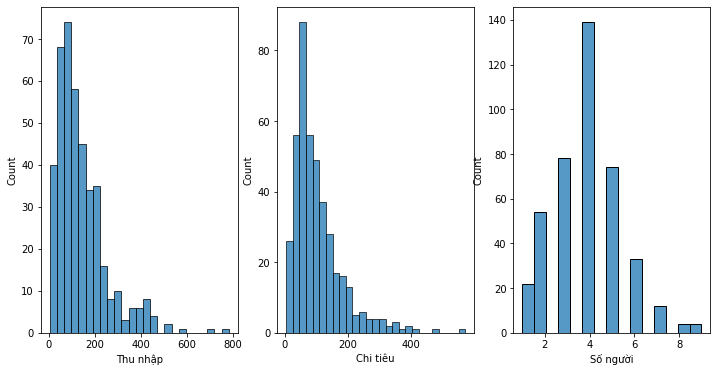

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(df["Thu nhập"])
plt.subplot(1,3,2)
sns.histplot(df["Chi tiêu"])
plt.subplot(1,3,3)
sns.histplot(df["Số người"])
plt.show()

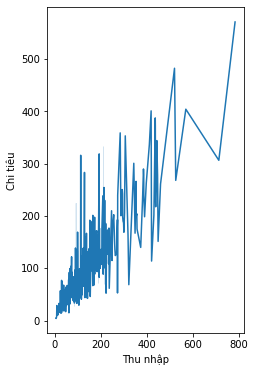

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.lineplot(x = "Thu nhập", y = "Chi tiêu", data = df)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     967.9
Date:                Thu, 27 May 2021   Prob (F-statistic):          7.47e-111
Time:                        10:23:10   Log-Likelihood:                -2179.7
No. Observations:                 420   AIC:                             4363.
Df Residuals:                     418   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8543      3.461      5.448      0.0

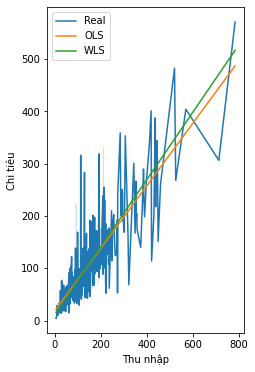

In [ ]:
x=df['Thu nhập'].to_numpy()
x1 = sm.add_constant(x)
y=df['Chi tiêu'].to_numpy()
ols_model = sm.OLS(y,x1)
ols_results = ols_model.fit()
print(ols_results.summary())

w = np.sqrt(x)
wls_model = sm.WLS(y,x1,weights=1. / (w**2))
wls_results = wls_model.fit()
print(wls_results.summary())

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
dfshow=df
dfshow['OLS']=ols_results.fittedvalues
dfshow['WLS']=wls_results.fittedvalues
sns.lineplot(x = "Thu nhập", y = "Chi tiêu", data = dfshow,legend="full",dashes = False,label="Real")
sns.lineplot(x = "Thu nhập", y = "OLS" ,data= dfshow,legend="full",dashes = False,label="OLS")
sns.lineplot(x = "Thu nhập", y = "WLS" ,data= dfshow,legend="full",dashes = False,label="WLS")

plt.show()

Sử dụng mô hình OLS

*   p-value < 0.001 . Mô hình có ý nghĩa về mặt thống kê, biến **Thu nhập** có ý nghĩa với mô hình thống kê
*   ta thấy rằng biến **Thu nhập** giải thích được 69.8% sự thay đổi của biến **Chi tiêu**
*   Phương trình hồi quy: **Chi tiêu**= 18.8543 + 0.5986 * **Thu nhập**

Sử dụng mô hình WLS

* p-value < 0.001 . Mô hình có ý nghĩa về mặt thống kê, biến **Thu nhập** có ý nghĩa với mô hình thống kê
* Sử dụng mô hình WLS ta thấy rằng biến **Thu nhập** giải thích được 72% sự thay đổi của biến **Chi tiêu**
* Phương trình hồi quy: **Chi tiêu**= 12.3122 + 0.6447 * **Thu nhập**


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     967.9
Date:                Thu, 27 May 2021   Prob (F-statistic):          7.47e-111
Time:                        10:26:45   Log-Likelihood:                -2319.8
No. Observations:                 420   AIC:                             4644.
Df Residuals:                     418   BIC:                             4652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8435      4.895      4.258      0.0

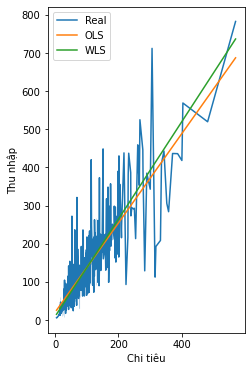

In [ ]:
x=df['Chi tiêu'].to_numpy()
x1 = sm.add_constant(x)
y=df['Thu nhập'].to_numpy()
ols_model = sm.OLS(y,x1)
ols_results = ols_model.fit()
print(ols_results.summary())

w = np.sqrt(x)
wls_model = sm.WLS(y,x1,weights=1. / (w**2))
wls_results = wls_model.fit()
print(wls_results.summary())

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
dfshow=df
dfshow['OLS']=ols_results.fittedvalues
dfshow['WLS']=wls_results.fittedvalues
sns.lineplot(x = "Chi tiêu", y = "Thu nhập", data = dfshow,legend="full",dashes = False,label="Real")
sns.lineplot(x = "Chi tiêu", y = "OLS" ,data= dfshow,legend="full",dashes = False,label="OLS")
sns.lineplot(x = "Chi tiêu", y = "WLS" ,data= dfshow,legend="full",dashes = False,label="WLS")

plt.show()

Sử dụng mô hình OLS

*   p-value < 0.001 . Mô hình có ý nghĩa về mặt thống kê, biến **Chi tiêu** có ý nghĩa với mô hình thống kê
*   ta thấy rằng biến **Chi tiêu** giải thích được 69.8% sự thay đổi của biến **Thu nhập**
*   Phương trình hồi quy: **Thu nhập**= 20.8435 + 1.2722 * **Thu nhập**

Sử dụng mô hình WLS

* p-value < 0.001. Mô hình có ý nghĩa về mặt thống kê, biến **Chi tiêu** có ý nghĩa với mô hình thống kê
* Sử dụng mô hình WLS ta thấy rằng biến **Chi tiêu** giải thích được 71.2% sự thay đổi của biến **Thu nhập**
* Phương trình hồi quy: **Thu nhập**= 9.8757 + 1.2722 * **Chi tiêu**
